Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


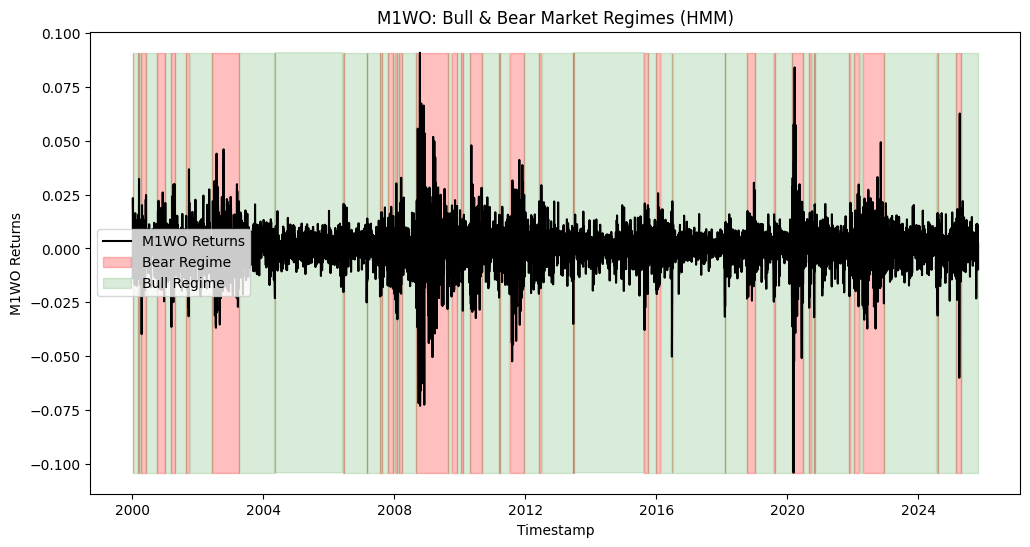

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)
df["Rfree"] = 0

In [2]:
df

,timestamp,CL1,M1WO,SXXT,SPX,NKY,SPTR,EUR003M,FEDL01,GC1,...,MOVE,VIX,USYC2Y10,VXJ,M1WO_O,FEDL01_O,EUR003M_O,state,regime,Rfree
0,2000-01-05,-0.025368,-0.013681,-0.028356,0.001920,0.000000,0.002008,-0.002,0.03,-0.005656,...,4.669927,3.273743,3.386084,3.258097,2741.90,5.41,3.341,1,Bear,0
1,2000-01-06,-0.005232,-0.011378,-0.006598,0.000955,0.000000,0.001155,-0.010,0.13,0.001063,...,4.655958,3.247658,3.072693,3.296207,2710.88,5.54,3.331,1,Bear,0
2,2000-01-07,-0.022858,0.023399,0.031469,0.026730,-6.583663,0.026730,-0.009,0.07,0.001769,...,4.583027,3.078233,2.747271,3.247658,2775.06,5.61,3.322,1,Bear,0
3,2000-01-10,0.018409,0.011027,0.015271,0.011128,6.583663,0.011147,-0.005,0.13,-0.000707,...,4.576050,3.077773,2.513656,3.247658,2805.83,5.74,3.317,0,Bull,0
4,2000-01-11,0.043623,-0.003420,-0.004971,-0.013149,-3.338158,-0.013119,-0.002,-0.11,0.005995,...,4.615418,3.113515,2.917771,3.151881,2796.25,5.63,3.315,0,Bull,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2025-10-27,-0.003094,0.010805,0.004416,0.012215,0.592428,0.012220,0.012,0.01,-0.028695,...,4.202750,2.759377,3.889532,3.425890,14141.13,4.12,2.084,0,Bull,0
6734,2025-10-28,-0.019102,0.001684,-0.000087,0.002285,3.717267,0.002290,-0.010,0.00,-0.008961,...,4.209160,2.798500,3.879087,3.279406,14164.97,4.12,2.074,0,Bull,0
6735,2025-10-29,0.005471,-0.000275,-0.000449,-0.000044,-3.842365,-0.000037,-0.008,0.00,0.004403,...,4.185860,2.828496,3.862139,3.330775,14161.08,4.12,2.066,0,Bull,0
6736,2025-10-30,0.001487,-0.009830,-0.001306,-0.009954,-4.115259,-0.009948,-0.016,-0.25,0.008050,...,4.202900,2.827905,3.880863,3.249987,14022.56,3.87,2.050,0,Bull,0


In [3]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)
pred_df

/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/568158868.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)


,timestamp,y_true,y_pred,pred_prob,M1WO_O
0,2010-01-01,0,0,0.286394,2796.04
1,2010-01-04,0,0,0.318800,2846.21
2,2010-01-05,0,0,0.185114,2854.58
3,2010-01-06,0,0,0.141117,2856.52
4,2010-01-07,0,0,0.123011,2855.09
...,...,...,...,...,...
4126,2025-10-27,0,0,0.074357,14141.13
4127,2025-10-28,0,0,0.056823,14164.97
4128,2025-10-29,0,0,0.065055,14161.08
4129,2025-10-30,0,0,0.092769,14022.56


In [4]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    tsh.merge_risk_free_rates(pred_df,df),
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=1,
    rf_col="FEDL01_O",
    lag = 0
)
summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

Timing spread (mean excess in vs out of market): -0.0006 (share in market: 75.84%)
             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        1.356211  0.053686  0.091356  0.468675    -0.218626   
BuyHoldEq       4.025733  0.103532  0.148473  0.646165    -0.340332   
BuyHoldRF       0.251103  0.013763  0.001110       NaN     0.000000   
Static50_50     1.624247  0.060636  0.074244  0.646165    -0.182756   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.021951        -0.018877       NaN  -0.012239   -0.018877  
BuyHoldEq      0.040828         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.040828       NaN        NaN         NaN  
Static50_50    0.034190        -0.006638       NaN        NaN         NaN  


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/663945018.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)


In [5]:
pred_df

,timestamp,y_true,y_pred,pred_prob,M1WO_O
0,2010-01-01,0,0,0.286394,2796.04
1,2010-01-04,0,0,0.318800,2846.21
2,2010-01-05,0,0,0.185114,2854.58
3,2010-01-06,0,0,0.141117,2856.52
4,2010-01-07,0,0,0.123011,2855.09
...,...,...,...,...,...
4126,2025-10-27,0,0,0.074357,14141.13
4127,2025-10-28,0,0,0.056823,14164.97
4128,2025-10-29,0,0,0.065055,14161.08
4129,2025-10-30,0,0,0.092769,14022.56


In [6]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    tsh.merge_risk_free_rates(pred_df,df),
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=1,
    rf_col="EUR003M_O"

)
summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

Timing spread (mean excess in vs out of market): -0.0006 (share in market: 80.70%)
             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        1.682435  0.062056  0.097128  0.603921    -0.229012   
BuyHoldEq       4.025733  0.103532  0.148473  0.695848    -0.340332   
BuyHoldRF       0.108663  0.006314  0.000822       NaN    -0.025619   
Static50_50     1.470373  0.056733  0.074243  0.695848    -0.183473   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.035071        -0.013133       NaN  -0.002807   -0.013133  
BuyHoldEq      0.048204         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.048204       NaN        NaN         NaN  
Static50_50    0.037878        -0.010326       NaN        NaN         NaN  


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/1901960813.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/981998147.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Logit": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True),
/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/981998147.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "RandomForrest": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True),
/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/981998147.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-e

Timing spread (mean excess in vs out of market): -0.0006 (share in market: 75.84%)
[DEBUG] Logit: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
Timing spread (mean excess in vs out of market): -0.0006 (share in market: 80.70%)
[DEBUG] RandomForrest: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
Timing spread (mean excess in vs out of market): -0.0000 (share in market: 80.70%)
[DEBUG] TabPFN-2.5: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
Timing spread (mean excess in vs out of market): 0.0003 (share in market: 80.02%)
[DEBUG] Mantis RF head: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
Timing spread (mean excess in vs out of market): 0.0003 (share in market: 79.61%)
[DEBUG] Mantis linear head: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
[DEBUG] common sample: 2010-01-01 00:00:00 -> 2025-10-30 00:00:00 (n=4130)
Total return on plotted sample:
  Mantis linear head: 408.04%
  W100: 402.57%
  Mantis RF head: 399.60%
  TabPFN-2.5: 308.56%
  RandomForrest:

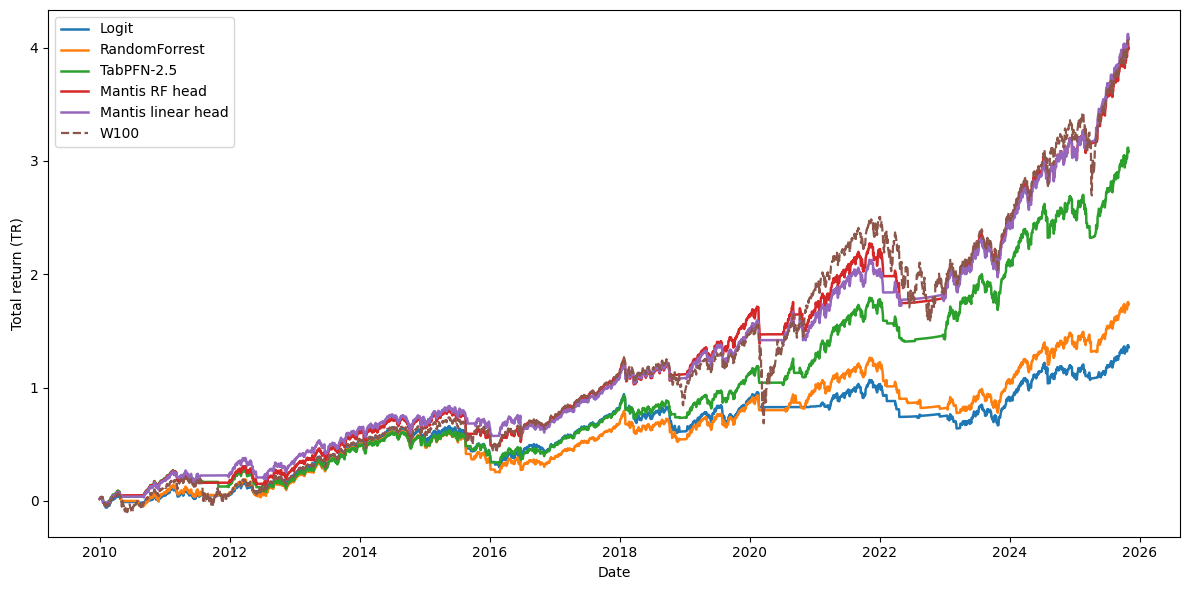

In [7]:
pred_dfs = {
    "Logit": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True),
    "RandomForrest": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True),
    "TabPFN-2.5": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_tabpfn25.csv", index_col=0, parse_dates=True),
    "Mantis RF head": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_mantis_rf_head.csv", index_col=0, parse_dates=True),
    "Mantis linear head": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_mantis_head.csv", index_col=0, parse_dates=True),
}

res = plot_ts.plot_regime_models_total_return(
    pred_dfs=pred_dfs,
    df_mkt=df,
    price_col="M1WO_O",
    rf_rate_col="FEDL01_O",
    regime_col="y_pred",
    bear_label=1,
    baselines=["100"],#, "50", "RF"],   # add "HA" if you want it
    start_date="2010-01-01",
    lag=0,
    tc_bps=0.0,
    debug=True,
    log_scale=False,

)


In [11]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    tsh.merge_risk_free_rates(pred_df,df),
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=1,
    rf_col="EUR003M_O",
    lag =1 
)

summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

Timing spread (mean excess in vs out of market): -0.0011 (share in market: 80.70%)
             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        0.943304  0.041382  0.099451  0.394429    -0.261545   
BuyHoldEq       3.937144  0.102361  0.148428  0.688861    -0.340332   
BuyHoldRF       0.108633  0.006314  0.000822       NaN    -0.025619   
Static50_50     1.448374  0.056170  0.074220  0.688861    -0.183473   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.014501        -0.032668       NaN  -0.022851   -0.032668  
BuyHoldEq      0.047169         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.047169       NaN        NaN         NaN  
Static50_50    0.037353        -0.009817       NaN        NaN         NaN  


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_88148/1073453397.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)


             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        0.943304  0.041382  0.099451  0.394429    -0.261545   
BuyHoldEq       3.937144  0.102361  0.148428  0.688861    -0.340332   
BuyHoldRF       0.108633  0.006314  0.000822       NaN    -0.025619   
Static50_50     1.448374  0.056170  0.074220  0.688861    -0.183473   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.014501        -0.032668       NaN  -0.022851   -0.032668  
BuyHoldEq      0.047169         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.047169       NaN        NaN         NaN  
Static50_50    0.037353        -0.009817       NaN        NaN         NaN  


In [10]:
for i in pred_dfs:
    print(f"Backtesting strategy for {i}")
    bt = tsh.backtest_paper_regime_switch(
        tsh.merge_risk_free_rates(pred_dfs[i],df),
        price_col="M1WO_O",
        regime_col="y_pred",
        ts_col="timestamp",
        bear_label=1,
        rf_col="FEDL01_O",
        lag = 1,
    )
    summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
    print(summary)

Backtesting strategy for Logit
Timing spread (mean excess in vs out of market): -0.0006 (share in market: 75.83%)
             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        1.375796  0.054232  0.092805  0.468407    -0.203232   
BuyHoldEq       3.937144  0.102361  0.148428  0.639143    -0.340332   
BuyHoldRF       0.251097  0.013766  0.001110       NaN     0.000000   
Static50_50     1.600907  0.060073  0.074222  0.639143    -0.182756   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.021939        -0.017852       NaN  -0.011724   -0.017852  
BuyHoldEq      0.039790         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.039790       NaN        NaN         NaN  
Static50_50    0.033663        -0.006127       NaN        NaN         NaN  
Bac